# Assignment 2 
## Experiment 2

In [1]:
import numpy as np
import pandas as pd
import pickle
import os
from sklearn.utils import shuffle

import matplotlib.pyplot as plt
%matplotlib inline
import pydot

import autokeras as ak
from autokeras import ImageClassifier
import tensorflow as tf

from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from keras.utils import plot_model
from keras.optimizers import Adam
from keras.callbacks import TensorBoard, EarlyStopping
import tensorflow as tf

from time import time

Using TensorFlow backend.


In [9]:
train_images = pickle.load( open( "../imagenet-200/train_images.pkl", "rb" ) )
train_labels = pickle.load( open( "../imagenet-200/train_labels.pkl", "rb" ) )
val_images = pickle.load( open( "../imagenet-200/val_images.pkl", "rb" ) )
val_labels = pickle.load( open( "../imagenet-200/val_labels.pkl", "rb" ) )
y_train = pickle.load( open( "../imagenet-200/y_train.pkl", "rb" ) )
y_test = pickle.load( open( "../imagenet-200/y_test.pkl", "rb" ) )

text_labels = pd.read_csv('../imagenet-200/map_clsloc.txt', sep='\s', header=None, engine='python')
text_labels.columns=['label', 'id', 'description']
text_labels.head()

,label,id,description
0,n02119789,1,kit_fox
1,n02100735,2,English_setter
2,n02110185,3,Siberian_husky
3,n02096294,4,Australian_terrier
4,n02102040,5,English_springer


## Preprocessing

In [3]:
train_images = train_images.astype('float32')
val_images = val_images.astype('float32')
train_images /= 255
val_images /= 255

train_images, train_labels, y_train = shuffle(train_images, train_labels, y_train, random_state=41)

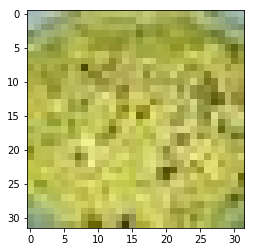

         label   id description
812  n07583066  813   guacamole


In [4]:
plotData = train_images[0]
plt.imshow(plotData)
plt.show()
print(text_labels.loc[text_labels['label']==train_labels[0]])

In [5]:
tf.logging.set_verbosity(tf.logging.ERROR)

In [10]:
start = time()

clf = ImageClassifier(verbose=True, augment=True)

clf.fit(train_images, train_labels, time_limit=24 * 60 * 60)
clf.final_fit(train_images, train_labels, val_images, val_labels, retrain=True)

# Save model and weights
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'autokeras_imagenet200.h5'

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)



Saving Directory: /tmp/autokeras_NC11X5
Preprocessing the images.
Preprocessing finished.

Initializing search.
Initialization finished.


+----------------------------------------------+
|               Training model 0               |
+----------------------------------------------+
                                                                                                    
No loss decrease after 5 epochs.


Saving model.
+--------------------------------------------------------------------------+
|        Model ID        |          Loss          |      Metric Value      |
+--------------------------------------------------------------------------+
|           0            |   14.830553245544433   |  0.18639999999999998   |
+--------------------------------------------------------------------------+


+----------------------------------------------+
|               Training model 1               |
+----------------------------------------------+
                              



+----------------------------------------------+
|              Training model 12               |
+----------------------------------------------+
                                                                                                    
No loss decrease after 5 epochs.


Saving model.
+--------------------------------------------------------------------------+
|        Model ID        |          Loss          |      Metric Value      |
+--------------------------------------------------------------------------+
|           12           |   11.482472324371338   |  0.39399999999999996   |
+--------------------------------------------------------------------------+


+----------------------------------------------+
|              Training model 13               |
+----------------------------------------------+
                                                                                                    
No loss decrease after 5 epochs.


Saving model.
+----------------



+----------------------------------------------+
|              Training model 24               |
+----------------------------------------------+
                                                                                                    
No loss decrease after 5 epochs.


Saving model.
+--------------------------------------------------------------------------+
|        Model ID        |          Loss          |      Metric Value      |
+--------------------------------------------------------------------------+
|           24           |   11.396671676635743   |         0.3984         |
+--------------------------------------------------------------------------+


+----------------------------------------------+
|              Training model 25               |
+----------------------------------------------+
                                                                                                    
No loss decrease after 5 epochs.


Saving model.
+----------------



+----------------------------------------------+
|              Training model 36               |
+----------------------------------------------+
                                                                                                    
No loss decrease after 5 epochs.


Saving model.
+--------------------------------------------------------------------------+
|        Model ID        |          Loss          |      Metric Value      |
+--------------------------------------------------------------------------+
|           36           |   11.349889278411865   |         0.4088         |
+--------------------------------------------------------------------------+


+----------------------------------------------+
|              Training model 37               |
+----------------------------------------------+
                                                                                                    
No loss decrease after 5 epochs.


Saving model.
+----------------

AttributeError: 'ImageClassifier' object has no attribute 'load_searcher'

In [16]:
clf.export_autokeras_model(model_path)
model_path2 = os.path.join(save_dir, 'autokeras_keras_imagenet200.h5')
clf.export_keras_model(model_path2)

In [12]:

# Evaluate
y = clf.evaluate(val_images, val_labels)

print('Test Accuracy: ' + str(y))


Test Accuracy: 0.4124


In [9]:
model = load_model('saved_models/autokeras_keras_imagenet200.h5') 

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 32, 64)   1792        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 32, 32, 64)   256         conv2d_1[0][0]                   
__________________________________________________________________________________________________
batch_normalization_2 (BatchNor (None, 32, 32, 64)   256         batch_normalization_1[0][0]      
__________________________________________________________________________________________________
activation

In [6]:
start = time()

clf = ImageClassifier(verbose=True, augment=False)

clf.fit(train_images, train_labels, time_limit=12 * 60 * 60)
clf.final_fit(train_images, train_labels, val_images, val_labels, retrain=True)

# Save model and weights
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'autokeras_12hr_imagenet200.h5'

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)

clf.export_keras_model(model_path)

model_path = os.path.join(save_dir, 'autokeras_ak_12hr_imagenet200.h5')
clf.export_autokeras_model(model_path)

# Evaluate
y = clf.evaluate(val_images, val_labels)
end = time()

print('Test Accuracy: ' + str(y))
print('Runtime: ' + str(end-start))

Saving Directory: /tmp/autokeras_KSBOKJ
Preprocessing the images.
Preprocessing finished.

Initializing search.
Initialization finished.


+----------------------------------------------+
|               Training model 0               |
+----------------------------------------------+
                                                                                                    
No loss decrease after 5 epochs.


Saving model.
+--------------------------------------------------------------------------+
|        Model ID        |          Loss          |      Metric Value      |
+--------------------------------------------------------------------------+
|           0            |   13.716635799407959   |  0.22480000000000003   |
+--------------------------------------------------------------------------+


+----------------------------------------------+
|               Training model 1               |
+----------------------------------------------+
                              



+----------------------------------------------+
|              Training model 23               |
+----------------------------------------------+
                                                                                                    
No loss decrease after 5 epochs.


Saving model.
+--------------------------------------------------------------------------+
|        Model ID        |          Loss          |      Metric Value      |
+--------------------------------------------------------------------------+
|           23           |   15.81759238243103    |  0.29480000000000006   |
+--------------------------------------------------------------------------+


+----------------------------------------------+
|              Training model 24               |
+----------------------------------------------+
                                                                                                    
No loss decrease after 5 epochs.


Saving model.
+----------------



Saving model.
+--------------------------------------------------------------------------+
|        Model ID        |          Loss          |      Metric Value      |
+--------------------------------------------------------------------------+
|           34           |   16.264367246627806   |         0.294          |
+--------------------------------------------------------------------------+


+----------------------------------------------+
|              Training model 35               |
+----------------------------------------------+
                                                                                                    
No loss decrease after 5 epochs.


Saving model.
+--------------------------------------------------------------------------+
|        Model ID        |          Loss          |      Metric Value      |
+--------------------------------------------------------------------------+
|           35           |   16.28153896331787    |         0.2992   



+----------------------------------------------+
|              Training model 46               |
+----------------------------------------------+
                                                                                                    
No loss decrease after 5 epochs.


Saving model.
+--------------------------------------------------------------------------+
|        Model ID        |          Loss          |      Metric Value      |
+--------------------------------------------------------------------------+
|           46           |   16.049102449417113   |  0.29359999999999997   |
+--------------------------------------------------------------------------+


+----------------------------------------------+
|              Training model 47               |
+----------------------------------------------+
                                                                                                    
No loss decrease after 5 epochs.


Saving model.
+----------------



+----------------------------------------------+
|              Training model 58               |
+----------------------------------------------+
                                                                                                    
No loss decrease after 5 epochs.


Saving model.
+--------------------------------------------------------------------------+
|        Model ID        |          Loss          |      Metric Value      |
+--------------------------------------------------------------------------+
|           58           |   15.867644834518433   |         0.3012         |
+--------------------------------------------------------------------------+


+----------------------------------------------+
|              Training model 59               |
+----------------------------------------------+
                                                                                                    
No loss decrease after 5 epochs.


Saving model.
+----------------

In [17]:
model = load_model('saved_models/autokeras_12hr_imagenet200.h5') #See 'How to export keras models?' to generate this file before loading it.

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 32, 64)   1792        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 32, 32, 64)   256         conv2d_1[0][0]                   
__________________________________________________________________________________________________
batch_normalization_2 (BatchNor (None, 32, 32, 64)   256         batch_normalization_1[0][0]      
__________________________________________________________________________________________________
activation